In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
house_df=pd.read_csv('DS1_C5_S3_BazilHousing_Data_Hackathon.csv')
house_df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  int64 
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


In [4]:
house_df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [5]:
def separate_data_types(house_df):
    categorical=[]
    continuous=[]
    for column in house_df.columns:
        if house_df[column].nunique() <43:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous

categorical, continuous=separate_data_types(house_df)

from tabulate import tabulate
print(tabulate({"categorical":categorical,
                 "continuous":continuous},
                 headers=["categorical", "continuous"]))


categorical     continuous
--------------  -------------------
city            area
rooms           hoa (R$)
bathroom        rent amount (R$)
parking spaces  property tax (R$)
floor           fire insurance (R$)
animal          total (R$)
furniture


In [6]:
def analysis_categ(col):
    print(f"Unique values in {col} are:{house_df[col].unique()}")

In [7]:
house_df.rename(columns={'parking spaces': 'parking_spaces'}, inplace=True)
house_df

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [8]:
analysis_categ('parking_spaces')

Unique values in parking_spaces are:[ 1  0  7  4  2  6  3  8  5 10 12]


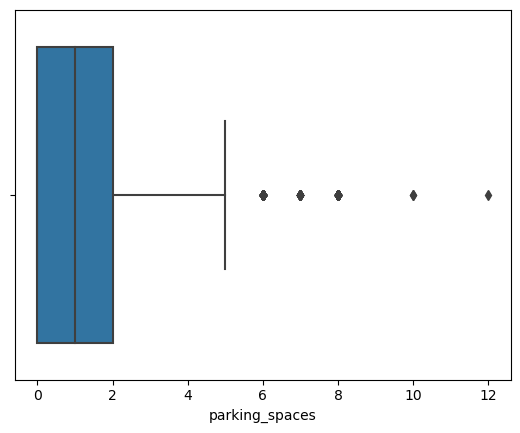

In [9]:
sns.boxplot(house_df['parking_spaces']);

In [10]:
house_df.rename(columns={'hoa (R$)': 'hoa'}, inplace=True)
house_df

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [11]:
analysis_categ('area')

Unique values in area are:[   70   320    80    51    25   376    72   213   152    35    26    46
    36    55   100   330   110    88    56   600    42   160    90    49
    41    64   208    20    32    45   350    38    30    40   300   240
   200   360   250    48   150    60    31   210   280    93    75   194
    65   278    61   130   164   220   108   128    47   170    68    63
   145    85   254   296   133    44    22    50    67   109   400   284
   309    73   155    58    94    76   192   217    95   900    34    62
   180   140    52   999   270    71   500    96   660   107   105   287
    24   154   101   384    57    39    78    28    83   750   258   123
   127   219   420    59   225   480    53   121    43   570    89   173
    91   530    87   136   308   260   120    33   131   161   720   236
    81   125    37   230   450   234   135   395    92   412   190   165
   380    19   124   115   700    15   204   540    23   178   114   113
    69   306   187   385 

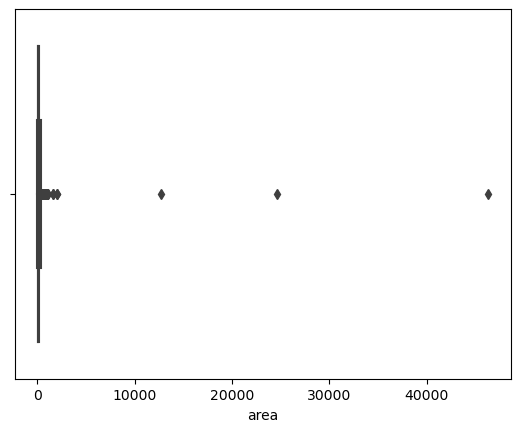

In [12]:
sns.boxplot(house_df['area'])
plt.show()

In [13]:
house_df['area'].describe()

count    10692.000000
mean       149.217920
std        537.016942
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max      46335.000000
Name: area, dtype: float64

## We can see that the Max value is 46.335 and de min 11 our std is 537 the data is too dispersed.

In [23]:
house_df1=house_df[house_df.area<=1000]
house_df1

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [15]:
house_df1.head()

,city,area,rooms,bathroom,parking_spaces,floor,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


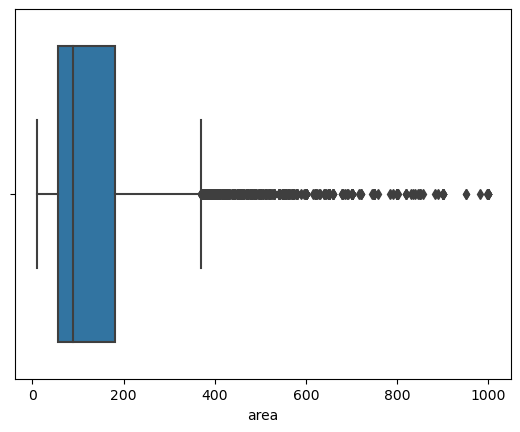

In [16]:
sns.boxplot(house_df1['area'])
plt.show()

In [17]:
house_df1['area'].describe()

count    10683.000000
mean       140.638865
std        129.829151
min         11.000000
25%         56.000000
50%         90.000000
75%        181.500000
max       1000.000000
Name: area, dtype: float64

## Before we had a std of 537 and now 129 our data is less disperse

In [22]:
house_df.rename(columns={'floor': 'floors'},inplace=True) 
house_df

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [19]:
analysis_categ('floors')

Unique values in floors are:[  7  20   6   2   1   0   4   3  10  11  24   9   8  17  18   5  13  15
  16  14  26  12  21  19  22  27  23  35  25  46  28  29 301  51  32]


In [20]:
(house_df['floors']>84).sum()

1

### Renaming column name of floor to floors 

## After some search I found out that the highest building in Brazil has 84 floors , so this is going to be our parameter. We can see that we have only 1 value higher than 84 .

In [25]:
house_df2=house_df1.query('floors<84')
house_df2

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [26]:
house_df2.head()

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


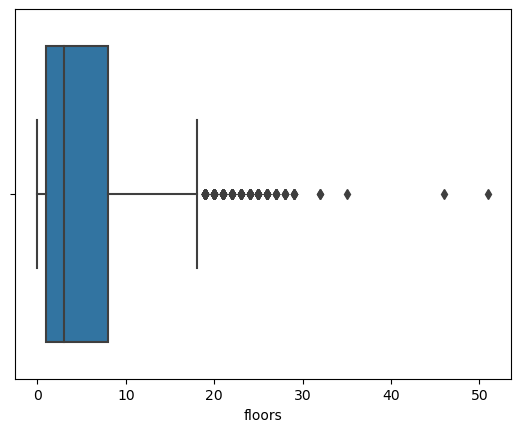

In [27]:
sns.boxplot(house_df2['floors']);

## Removed the higher values from the floor column

In [28]:
analysis_categ('hoa')

Unique values in hoa are:[2065 1200 1000 ... 1462 2515 3519]


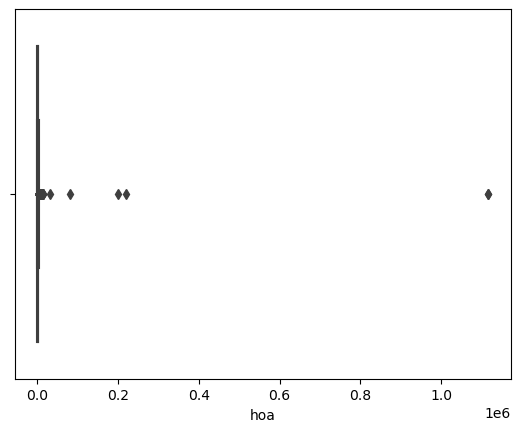

In [29]:
sns.boxplot(house_df['hoa']);

In [30]:
hoa_filter=house_df.query('hoa<10000')
hoa_filter.head()

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


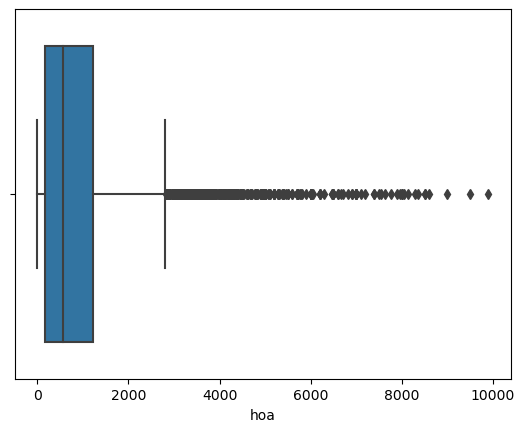

In [31]:
sns.boxplot(hoa_filter['hoa']);

## hoa higher than 10000 is considered as luxrious houses so we need to take houses less than 10000.

In [32]:
house_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
area,10682.0,140.644542,129.833903,11.0,56.00,90.0,181.75,1000.0
rooms,10682.0,2.504587,1.170442,1.0,2.00,2.0,3.00,13.0
bathroom,10682.0,2.234975,1.405322,1.0,1.00,2.0,3.00,10.0
parking_spaces,10682.0,1.605973,1.583211,0.0,0.00,1.0,2.00,10.0
floors,10682.0,5.041940,5.352277,0.0,1.00,3.0,8.00,51.0
hoa,10682.0,1174.122355,15599.561226,0.0,170.00,560.0,1236.75,1117000.0
rent amount (R$),10682.0,3893.737034,3407.669795,450.0,1529.25,2650.0,5000.00,45000.0
property tax (R$),10682.0,365.301442,3108.040362,0.0,38.00,125.0,375.00,313700.0
fire insurance (R$),10682.0,53.261000,47.748552,3.0,21.00,36.0,68.00,677.0
total (R$),10682.0,5486.634151,16491.139444,499.0,2060.25,3578.5,6760.25,1120000.0


In [33]:
house_df2.city

0             São Paulo
1             São Paulo
2          Porto Alegre
3          Porto Alegre
4             São Paulo
              ...      
10687      Porto Alegre
10688         São Paulo
10689    Rio de Janeiro
10690    Rio de Janeiro
10691         São Paulo
Name: city, Length: 10682, dtype: object

## Univariant analysis

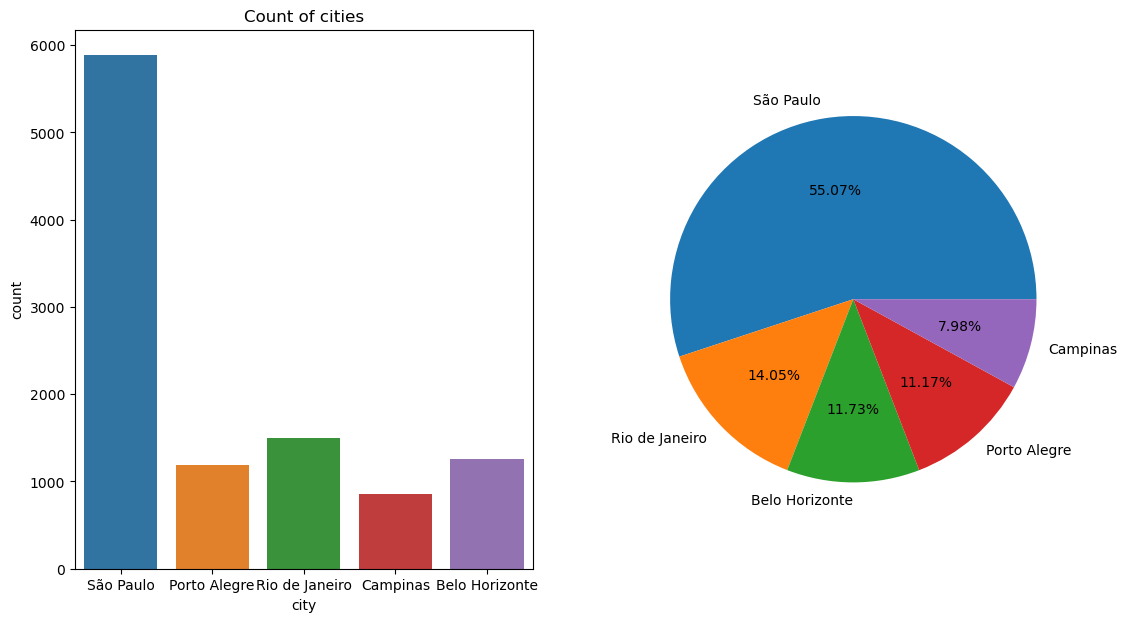

In [34]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of cities")
percentage=house_df2["city"].value_counts()
labels=list(house_df2["city"].value_counts().index)

sns.countplot(x=house_df2["city"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

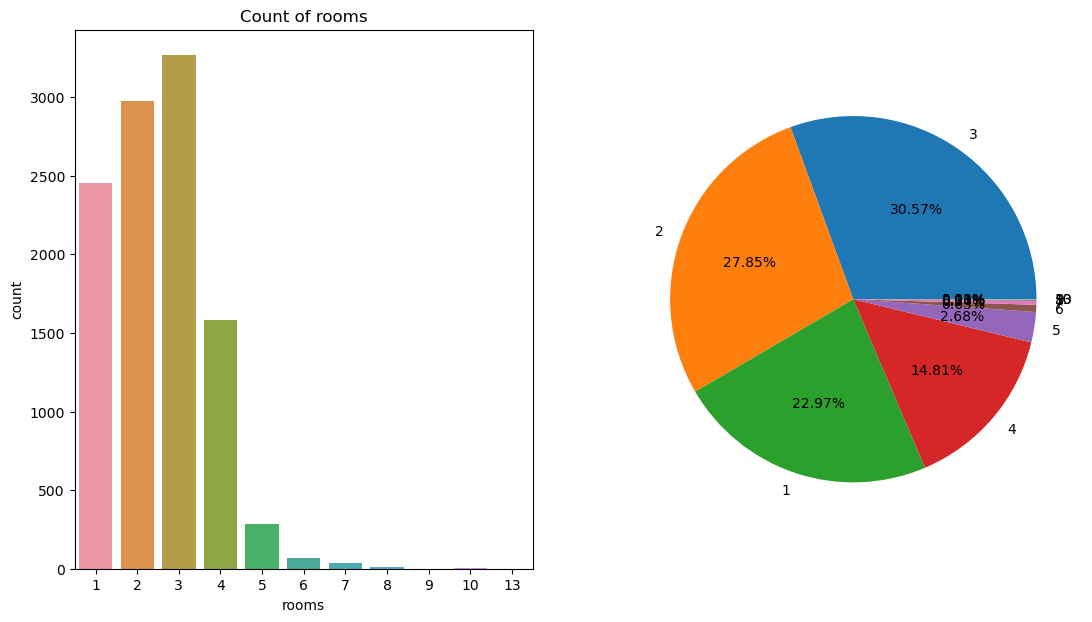

In [35]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of rooms")
percentage=house_df2["rooms"].value_counts()
labels=list(house_df2["rooms"].value_counts().index)

sns.countplot(x=house_df2["rooms"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

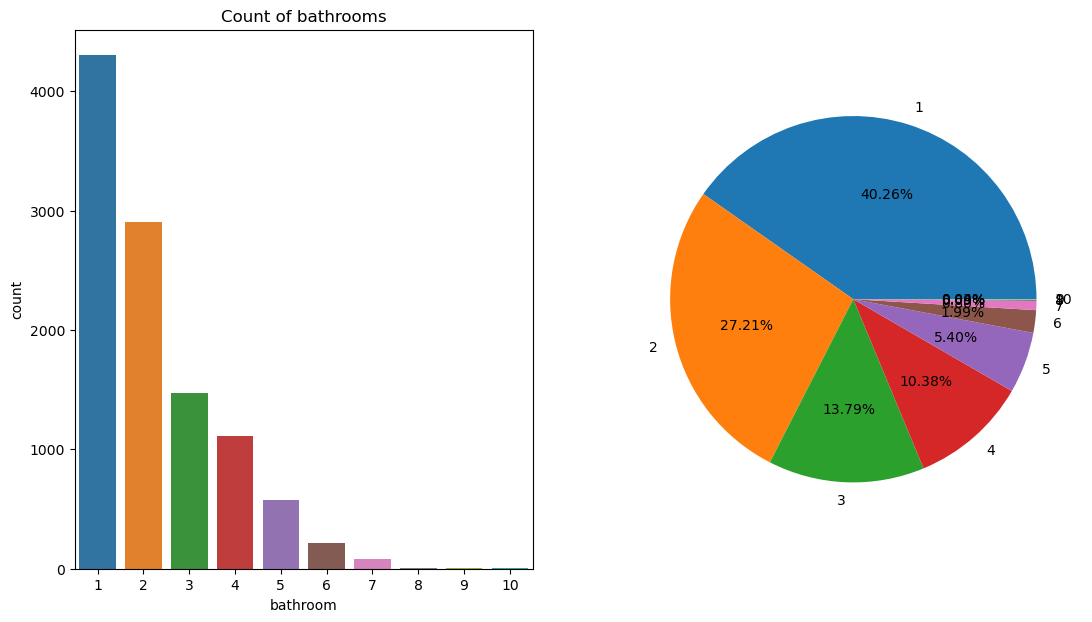

In [36]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of bathrooms")
percentage=house_df2["bathroom"].value_counts()
labels=list(house_df2["bathroom"].value_counts().index)

sns.countplot(x=house_df2["bathroom"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

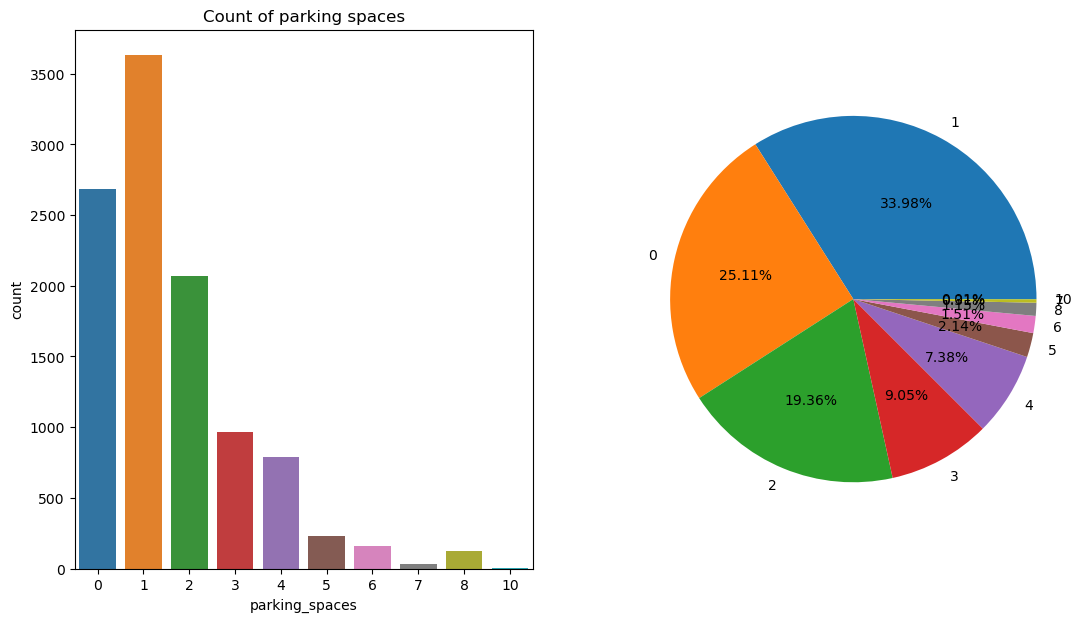

In [37]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of parking spaces")
percentage=house_df2["parking_spaces"].value_counts()
labels=list(house_df2["parking_spaces"].value_counts().index)

sns.countplot(x=house_df2["parking_spaces"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

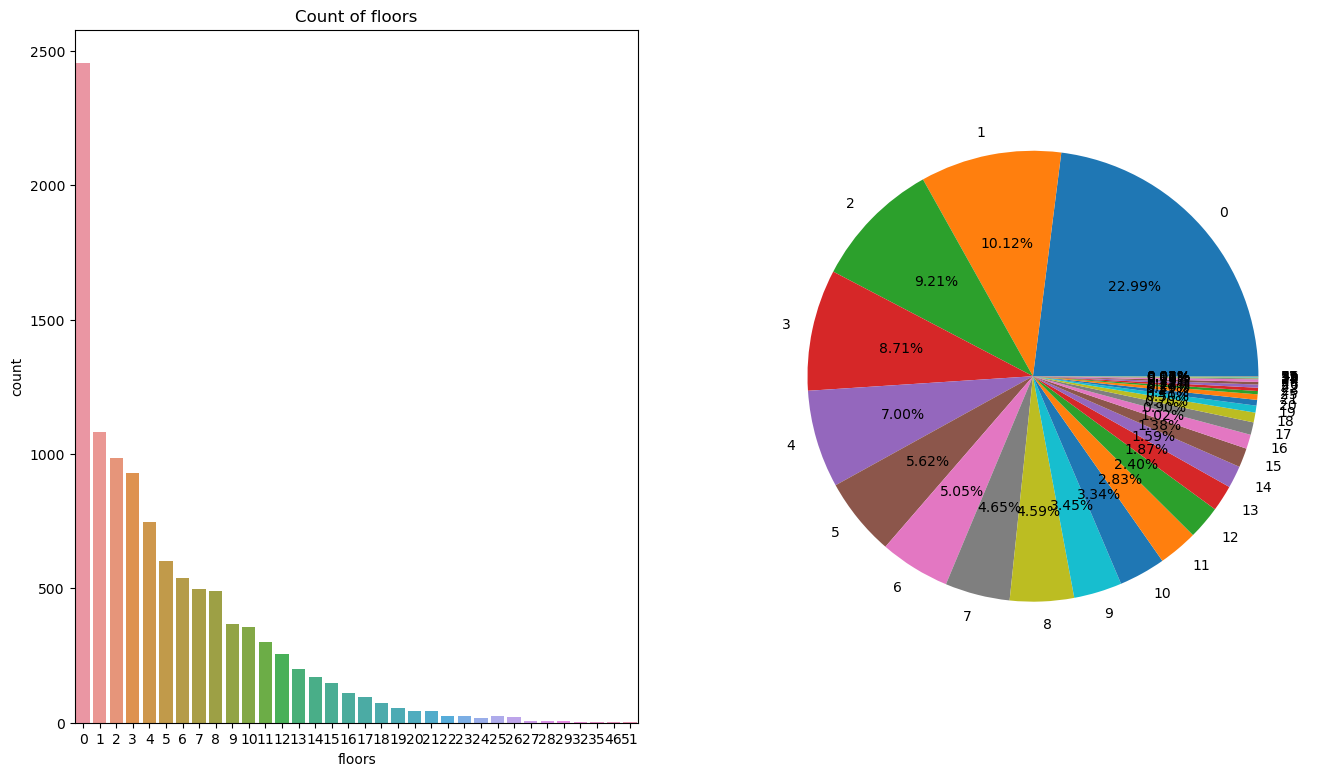

In [81]:
fig, ax=plt.subplots(1,2, figsize=(16,9))
ax[0].set_title("Count of floors")
percentage=house_df2["floors"].value_counts()
labels=list(house_df2["floors"].value_counts().index)

sns.countplot(x=house_df2["floors"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

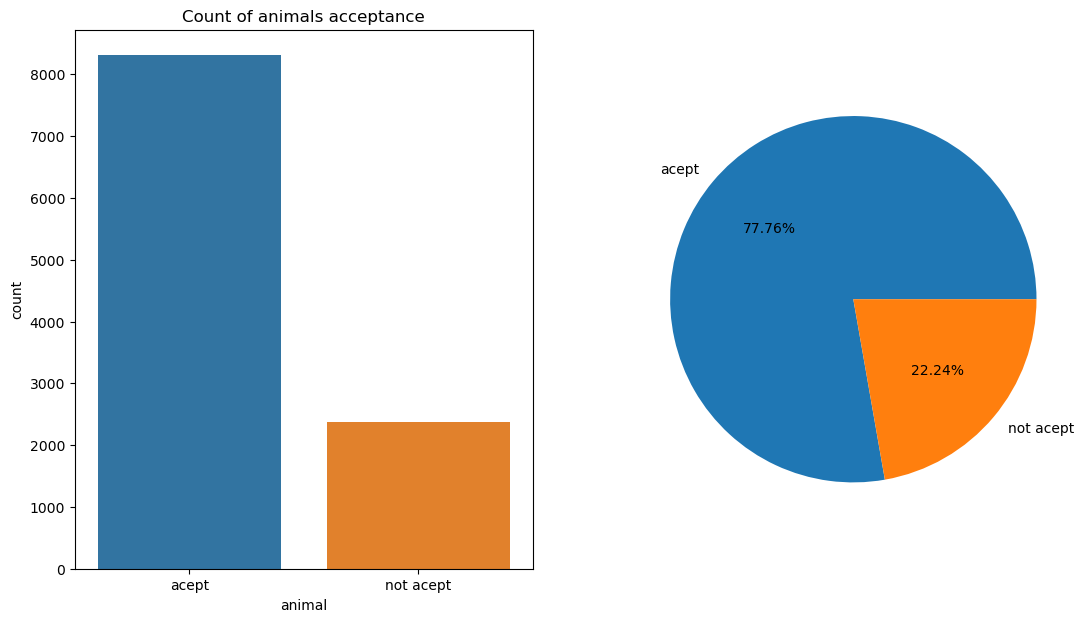

In [39]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of animals acceptance")
percentage=house_df2["animal"].value_counts()
labels=list(house_df2["animal"].value_counts().index)

sns.countplot(x=house_df2["animal"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

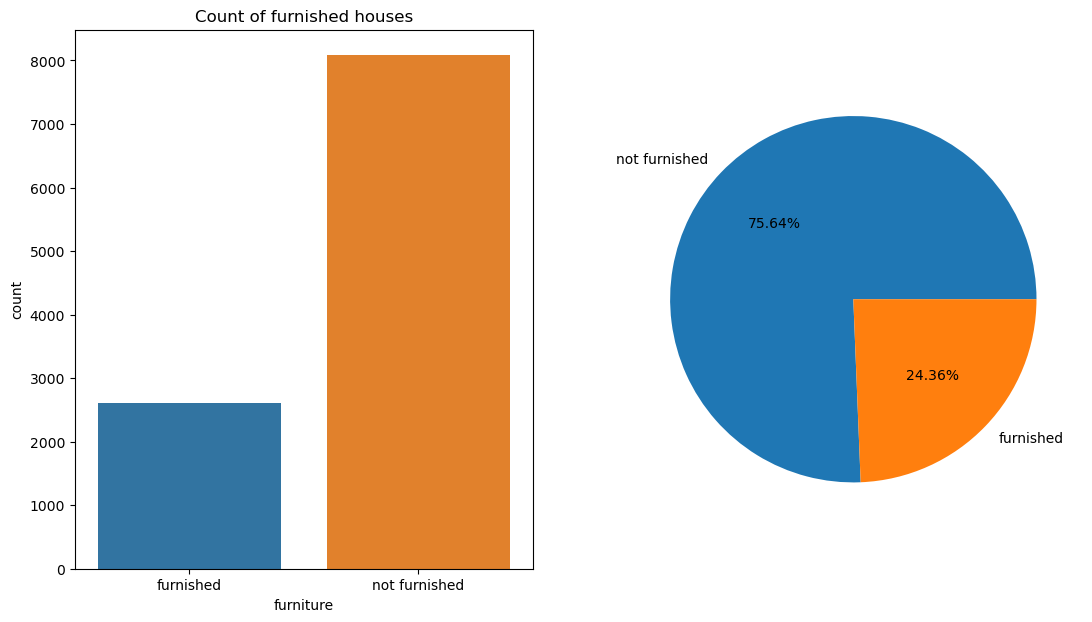

In [40]:
fig, ax=plt.subplots(1,2, figsize=(13,7))
ax[0].set_title("Count of furnished houses")
percentage=house_df2["furniture"].value_counts()
labels=list(house_df2["furniture"].value_counts().index)

sns.countplot(x=house_df2["furniture"], ax=ax[0])
plt.pie(percentage, labels=labels, autopct="%0.2f%%")

plt.show()

## Bivariant analysis:

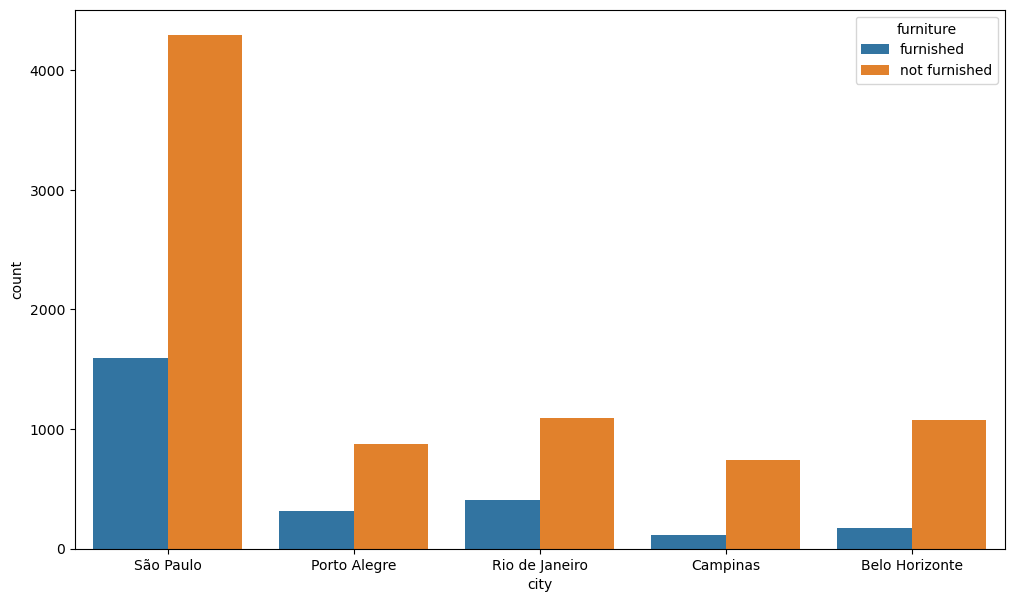

In [41]:
fig, ax=plt.subplots(figsize=(12,7))
sns.countplot(x="city", hue="furniture", data=house_df2);

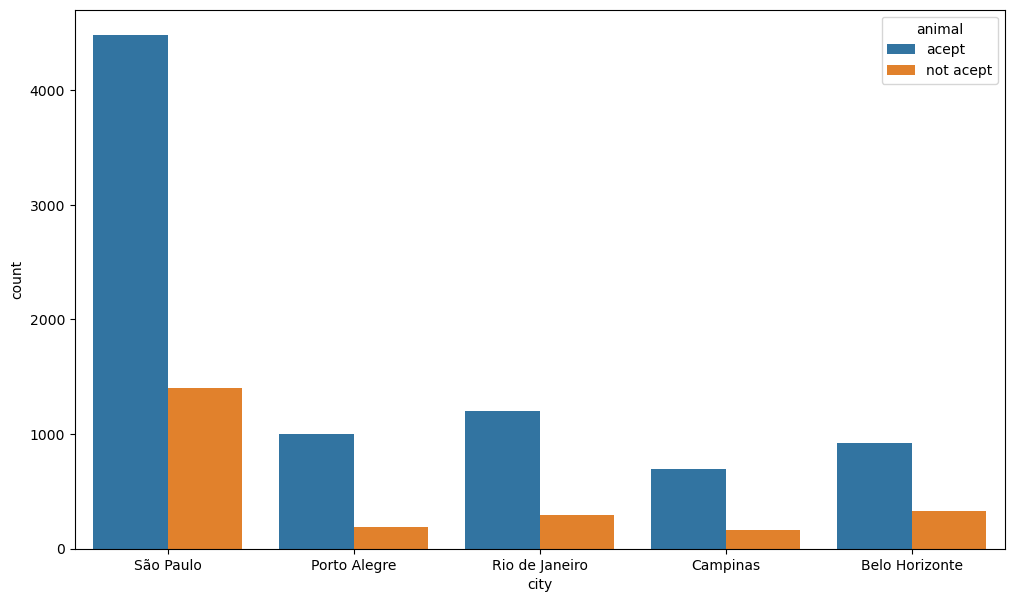

In [42]:
fig, ax=plt.subplots(figsize=(12,7))
sns.countplot(x="city", hue="animal", data=house_df2);

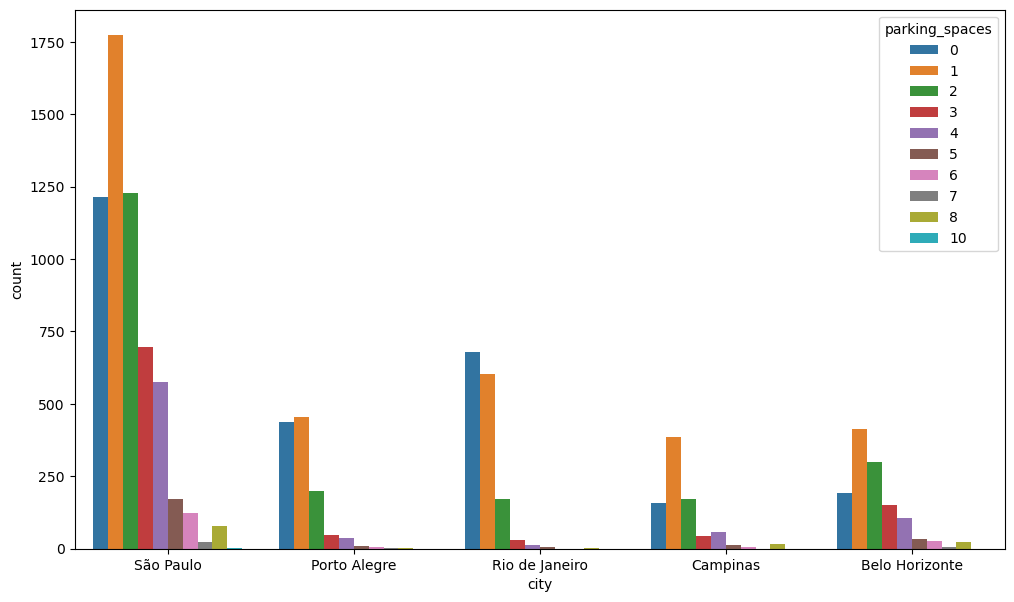

In [43]:
fig, ax=plt.subplots(figsize=(12,7))
sns.countplot(x="city", hue="parking_spaces", data=house_df2);

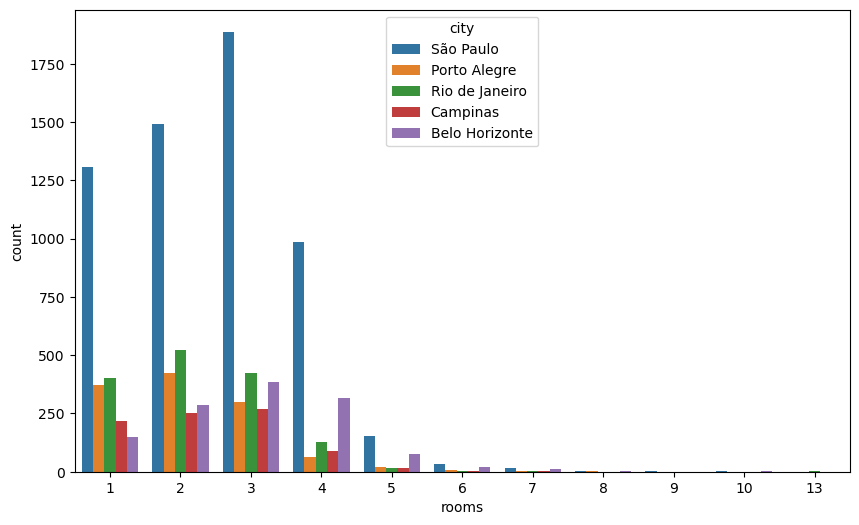

In [44]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x="rooms", hue="city", data=house_df2);

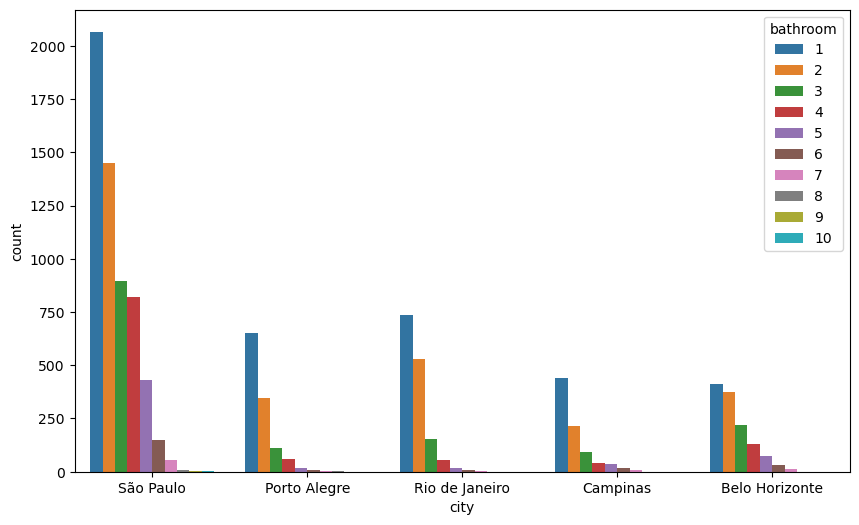

In [45]:
fig, ax=plt.subplots(figsize=(10,6))
sns.countplot(x="city", hue="bathroom", data=house_df2);

## Multivariate Analysis:

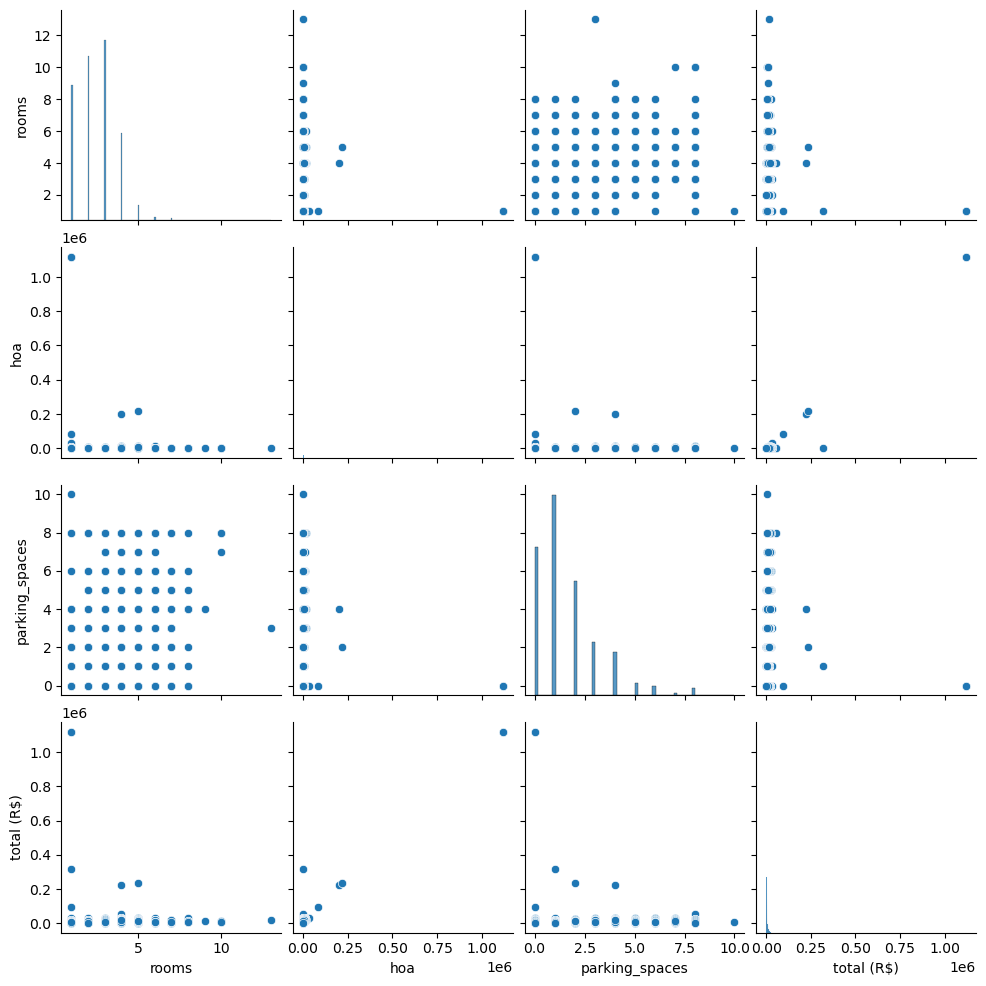

In [46]:
sns.pairplot(data=house_df2[['rooms', 'hoa', 'parking_spaces', 'total (R$)']], palette='viridis');

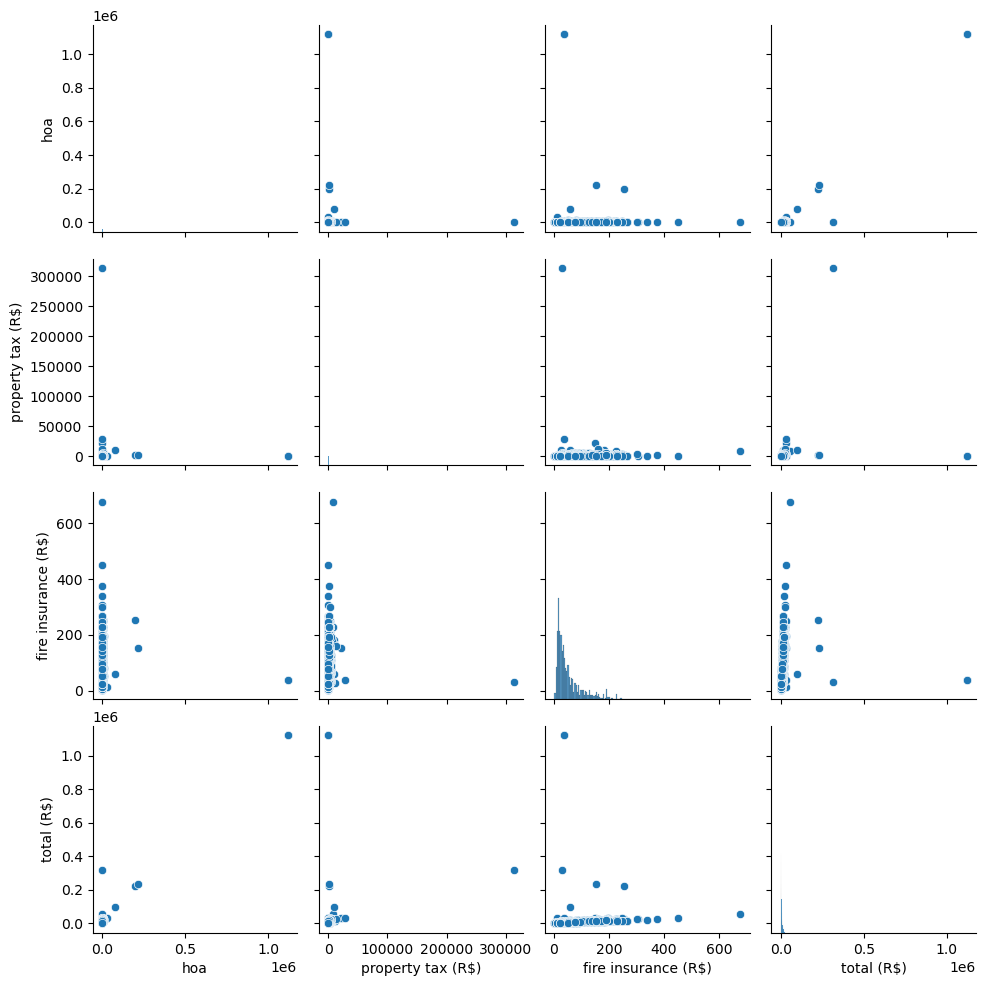

In [79]:
sns.pairplot(data=house_df2[['hoa', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']], palette='viridis');

## From the question they said that employees from Rio De Janerio and Sao Paulo are looking to relocate to other cities so for that we are filtering out that cities from the dataset.

In [48]:
filtering_cities=house_df2[(house_df2.city=='Porto Alegre')|(house_df2.city=='Campinas')|(house_df2.city=='Belo Horizonte')]
filtering_cities

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
11,Campinas,46,1,1,1,10,acept,not furnished,550,580,43,8,1181
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
21,Belo Horizonte,42,1,1,1,17,not acept,furnished,470,2690,172,36,3368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10667,Belo Horizonte,75,2,1,1,3,not acept,not furnished,180,1250,0,17,1447
10673,Porto Alegre,220,3,2,2,15,acept,not furnished,842,2400,117,36,3395
10676,Porto Alegre,40,1,1,0,1,acept,not furnished,330,1200,159,18,1707
10682,Porto Alegre,160,3,2,3,4,acept,furnished,850,3300,220,49,4419


## For bachelors we are filtering the data as area less than 110 and rooms and bathroom, parking spaces as 2 and accepting animals house is furnished as well.

In [49]:
bachelors=filtering_cities[(filtering_cities.area<=110)&(filtering_cities.rooms==1)&(filtering_cities.bathroom==1)&(filtering_cities.parking_spaces<=2)&(filtering_cities.animal=='acept')&(filtering_cities.furniture=='furnished')]
bachelors

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
39,Porto Alegre,40,1,1,1,6,acept,furnished,390,2990,0,44,3424
47,Porto Alegre,42,1,1,2,2,acept,furnished,190,1770,17,26,2003
49,Campinas,48,1,1,1,2,acept,furnished,505,1600,59,21,2185
136,Campinas,44,1,1,0,3,acept,furnished,350,916,12,12,1290
165,Porto Alegre,44,1,1,1,2,acept,furnished,250,1500,17,22,1789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,Porto Alegre,37,1,1,0,6,acept,furnished,430,2220,84,33,2767
10486,Campinas,55,1,1,1,9,acept,furnished,660,2600,73,33,3366
10551,Campinas,52,1,1,1,3,acept,furnished,730,3000,59,39,3828
10569,Belo Horizonte,20,1,1,1,0,acept,furnished,0,1100,0,15,1115


In [50]:
bachelors.describe().T

,count,mean,std,min,25%,50%,75%,max
area,96.0,44.177083,11.265219,18.0,40.00,43.5,50.0,70.0
rooms,96.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
bathroom,96.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
parking_spaces,96.0,0.583333,0.574304,0.0,0.00,1.0,1.0,2.0
floors,96.0,4.510417,4.511960,0.0,2.00,3.0,6.0,21.0
hoa,96.0,408.625000,332.598612,0.0,207.50,318.0,535.0,1580.0
rent amount (R$),96.0,1523.739583,749.772867,550.0,1083.00,1294.0,1825.0,5000.0
property tax (R$),96.0,41.364583,39.108787,0.0,11.00,30.0,63.5,151.0
fire insurance (R$),96.0,21.697917,10.117332,7.0,15.00,19.0,25.0,64.0
total (R$),96.0,1995.427083,977.987103,831.0,1284.75,1738.5,2368.5,6026.0


In [51]:
bachelors.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Campinas          2594.875000
Porto Alegre      1827.953125
Belo Horizonte    1536.875000
Name: total (R$), dtype: float64

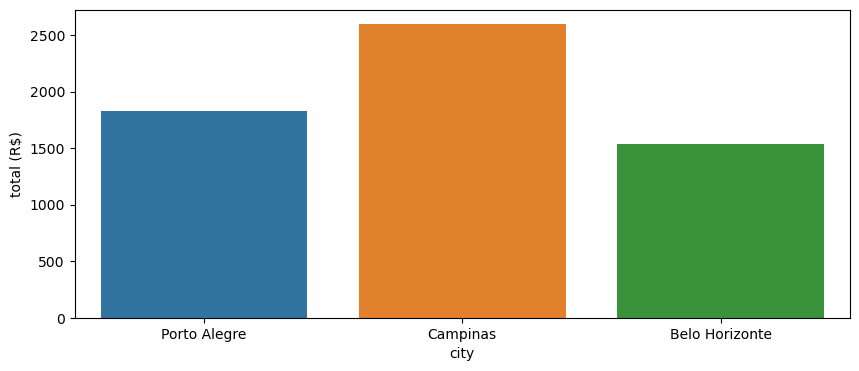

In [82]:
plt.figure(figsize=(10,4))
sns.barplot(x= bachelors['city'], y= bachelors['total (R$)'],ci= False);

## By analysing above graph we can say that Belo horizonte and porto alegre are the cities better for bachelors with furnished house and as well as animals accepted.

In [53]:
bachelors_without=filtering_cities[(filtering_cities.area<=110)&(filtering_cities.rooms==1)&(filtering_cities.bathroom==1)&(filtering_cities.parking_spaces<=2)&(filtering_cities.hoa==0)&(filtering_cities.animal=='not acept')&(filtering_cities.furniture=='not furnished')]
bachelors_without

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
291,Belo Horizonte,40,1,1,0,0,not acept,not furnished,0,900,0,15,915
1757,Belo Horizonte,27,1,1,0,2,not acept,not furnished,0,1167,334,16,1517
1772,Campinas,54,1,1,1,6,not acept,not furnished,0,1370,31,18,1419
1847,Belo Horizonte,30,1,1,0,2,not acept,not furnished,0,550,0,8,558
1990,Porto Alegre,24,1,1,1,0,not acept,not furnished,0,550,0,9,559
2093,Belo Horizonte,40,1,1,0,0,not acept,not furnished,0,650,59,11,720
2121,Porto Alegre,25,1,1,0,0,not acept,not furnished,0,550,0,9,559
2386,Belo Horizonte,25,1,1,1,1,not acept,not furnished,0,550,84,8,642
2578,Belo Horizonte,55,1,1,0,0,not acept,not furnished,0,1020,21,17,1058
3839,Belo Horizonte,25,1,1,0,2,not acept,not furnished,0,650,0,9,659


In [54]:
bachelors_without.describe().T

,count,mean,std,min,25%,50%,75%,max
area,36.0,32.583333,10.365809,16.0,25.0,30.0,40.00,55.0
rooms,36.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
bathroom,36.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
parking_spaces,36.0,0.277778,0.454257,0.0,0.0,0.0,1.00,1.0
floors,36.0,1.000000,1.218899,0.0,0.0,1.0,1.00,6.0
hoa,36.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
rent amount (R$),36.0,891.222222,307.048355,500.0,650.0,805.0,1167.00,1500.0
property tax (R$),36.0,34.805556,77.220582,0.0,0.0,0.0,38.25,334.0
fire insurance (R$),36.0,13.055556,4.140010,7.0,9.0,13.0,16.25,22.0
total (R$),36.0,939.083333,333.350984,509.0,659.0,844.5,1260.00,1520.0


In [ ]:
bachelors_without.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Campinas          1192.333333
Belo Horizonte     959.965517
Porto Alegre       597.750000
Name: total (R$), dtype: float64

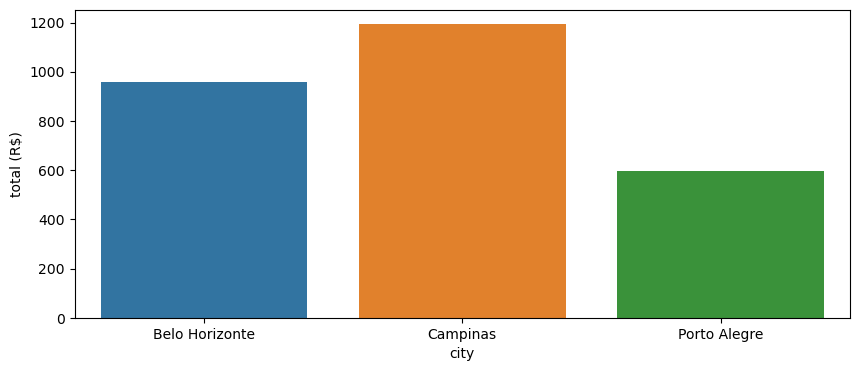

In [56]:
plt.figure(figsize=(10,4))
sns.barplot(x= bachelors_without['city'], y= bachelors_without['total (R$)'],ci= False);

## By analysing above graph we can say that Porto Alegre and Belo Horizonte are the cities best for bachelors without furnished and also animals not allowed and there is huge drop in price when removing with these two parameters.

In [57]:
mid_size_fam=filtering_cities[(filtering_cities.area<=280)&(filtering_cities.rooms<=3)&(filtering_cities.bathroom==2)&(filtering_cities.parking_spaces==2)&(filtering_cities.animal=='acept')&(filtering_cities.furniture=='furnished')]
mid_size_fam[mid_size_fam['area'].between(110, 280)]

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
660,Belo Horizonte,140,2,2,2,11,acept,furnished,692,2800,104,38,3634
739,Porto Alegre,120,3,2,2,2,acept,furnished,700,2975,155,44,3874
1785,Porto Alegre,112,3,2,2,3,acept,furnished,800,4100,100,60,5060
2888,Porto Alegre,132,3,2,2,9,acept,furnished,1000,3350,167,49,4566
2926,Porto Alegre,148,3,2,2,3,acept,furnished,2200,3990,167,59,6416
3978,Porto Alegre,127,3,2,2,2,acept,furnished,600,2900,220,43,3763
4613,Porto Alegre,129,2,2,2,9,acept,furnished,1200,6800,209,100,8309
5227,Porto Alegre,140,3,2,2,3,acept,furnished,1300,3200,167,47,4714
6225,Campinas,130,3,2,2,4,acept,furnished,1150,2800,184,36,4170
8121,Porto Alegre,179,3,2,2,0,acept,furnished,0,3700,67,66,3833


In [58]:
mid_size_fam.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Porto Alegre      4686.590909
Belo Horizonte    4060.000000
Campinas          3753.823529
Name: total (R$), dtype: float64

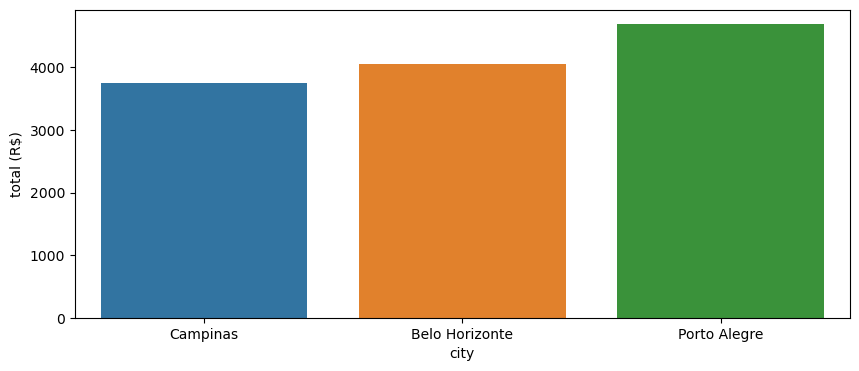

In [59]:
plt.figure(figsize=(10,4))
sns.barplot(x= mid_size_fam['city'], y= mid_size_fam['total (R$)'],ci= False);

## For mid size families with furnished house and accepting animals campinas belo horizonte cities are best relocation when compared with remaining cities.

In [60]:
mid_size_fam_without=filtering_cities[(filtering_cities.area<=280)&(filtering_cities.rooms<=3)&(filtering_cities.bathroom==2)&(filtering_cities.parking_spaces==2)&(filtering_cities.animal=='not acept')&(filtering_cities.furniture=='not furnished')]
mid_size_fam_without[mid_size_fam_without['area'].between(110, 280)]

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
1063,Belo Horizonte,166,2,2,2,6,not acept,not furnished,300,2100,253,28,2681
3212,Campinas,110,3,2,2,7,not acept,not furnished,900,2100,100,27,3127
3567,Belo Horizonte,120,3,2,2,4,not acept,not furnished,350,1500,81,20,1951
4735,Porto Alegre,120,3,2,2,2,not acept,not furnished,600,2000,121,30,2751
5290,Belo Horizonte,110,2,2,2,4,not acept,not furnished,290,1346,88,10,1734
6340,Belo Horizonte,120,3,2,2,1,not acept,not furnished,318,1700,331,23,2372
7920,Belo Horizonte,202,3,2,2,0,not acept,not furnished,0,3000,172,50,3222
9729,Belo Horizonte,114,3,2,2,8,not acept,not furnished,784,3500,308,47,4639
10104,Belo Horizonte,160,3,2,2,4,not acept,not furnished,718,3100,183,42,4043
10444,Belo Horizonte,120,3,2,2,3,not acept,not furnished,335,1300,166,18,1819


In [61]:
mid_size_fam_without.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Porto Alegre      2998.800000
Belo Horizonte    2981.193548
Campinas          2693.400000
Name: total (R$), dtype: float64

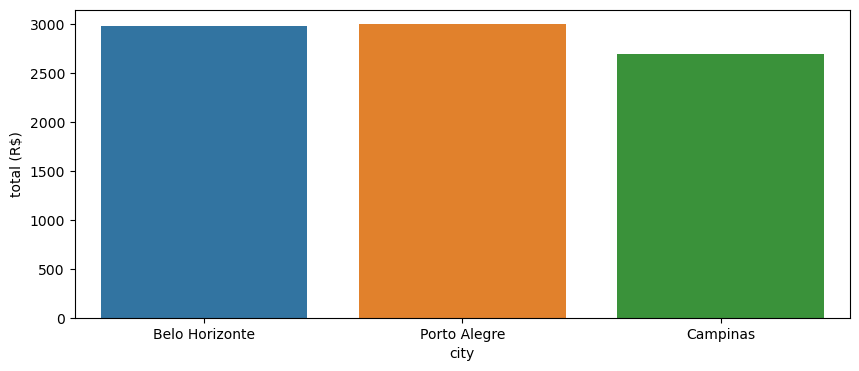

In [62]:
plt.figure(figsize=(10,4))
sns.barplot(x= mid_size_fam_without['city'], y= mid_size_fam_without['total (R$)'],ci= False);

## For mid size families without furinshed house and also not accepting animals with these parameters Belo horizonto and campinas cities are better for living without these parameters there is more difference in the total price.

In [63]:
large_fam=filtering_cities[(filtering_cities.area>=300)&(filtering_cities.bathroom>=3)&(filtering_cities.rooms>=3)&(filtering_cities. parking_spaces>=3)&(filtering_cities.animal=='acept')&(filtering_cities.furniture=='furnished')]
large_fam

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
15,Campinas,330,4,6,6,0,acept,furnished,680,8000,328,121,9129
91,Porto Alegre,350,4,4,4,0,acept,furnished,1,9000,359,160,9520
241,Belo Horizonte,570,5,6,7,0,acept,furnished,0,8330,873,137,9340
490,Porto Alegre,360,3,4,3,5,acept,furnished,4000,13200,500,193,17890
538,Belo Horizonte,428,5,5,4,0,acept,furnished,0,9600,667,158,10430
726,Belo Horizonte,325,5,4,7,0,acept,furnished,0,8900,417,146,9463
753,Belo Horizonte,600,5,6,8,0,acept,furnished,0,10500,642,173,11320
915,Porto Alegre,600,5,4,5,0,acept,furnished,0,12000,1167,214,13380
1041,Belo Horizonte,800,7,7,4,0,acept,furnished,0,8900,943,146,9989
1255,Porto Alegre,450,5,4,4,0,acept,furnished,0,9000,250,160,9410


In [64]:
large_fam.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Belo Horizonte    11584.800000
Campinas          10295.400000
Porto Alegre       9822.066667
Name: total (R$), dtype: float64

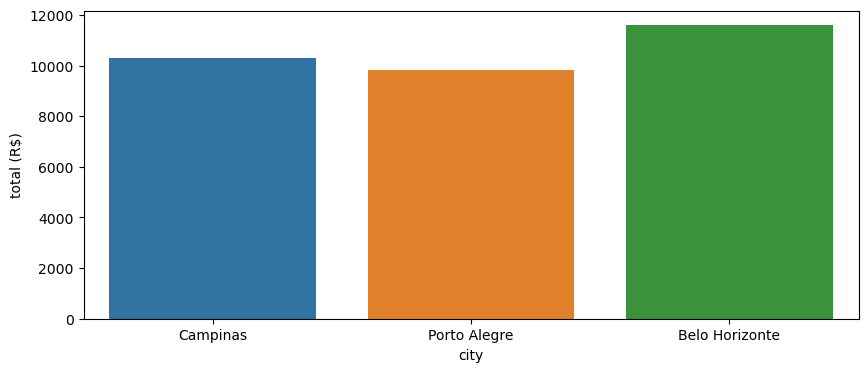

In [65]:
plt.figure(figsize=(10,4))
sns.barplot(x= large_fam['city'], y= large_fam['total (R$)'],ci= False);

## For large families porto alegre and campinas are the cities better for living with furnished houses and as well as animals allowed.

In [66]:
large_fam_without=filtering_cities[(filtering_cities.area>=300)&(filtering_cities.bathroom>=3)&(filtering_cities.rooms>=3)&(filtering_cities.parking_spaces>=3)&(filtering_cities.hoa==0)&(filtering_cities.animal=='not acept')&(filtering_cities.furniture=='not furnished')]
large_fam_without

,city,area,rooms,bathroom,parking_spaces,floors,animal,furniture,hoa,rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
564,Belo Horizonte,300,5,5,5,0,not acept,not furnished,0,4500,450,74,5024
626,Campinas,750,4,5,5,0,not acept,not furnished,0,10400,667,157,11220
1200,Porto Alegre,360,4,4,4,0,not acept,not furnished,0,2820,321,51,3192
1285,Porto Alegre,350,3,4,4,0,not acept,not furnished,0,3500,167,63,3730
1297,Belo Horizonte,497,5,5,4,0,not acept,not furnished,0,8000,720,132,8852
2086,Belo Horizonte,320,5,4,6,0,not acept,not furnished,0,8000,584,132,8716
2548,Belo Horizonte,384,5,4,6,0,not acept,not furnished,0,5000,435,82,5517
2647,Belo Horizonte,580,5,6,5,0,not acept,not furnished,0,15000,1153,246,16400
3511,Belo Horizonte,450,7,5,3,0,not acept,not furnished,0,7880,292,130,8302
5916,Belo Horizonte,344,4,4,3,0,not acept,not furnished,0,3500,121,58,3679


In [67]:
large_fam_without.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
Belo Horizonte    8557.000000
Campinas          6709.666667
Porto Alegre      3461.000000
Name: total (R$), dtype: float64

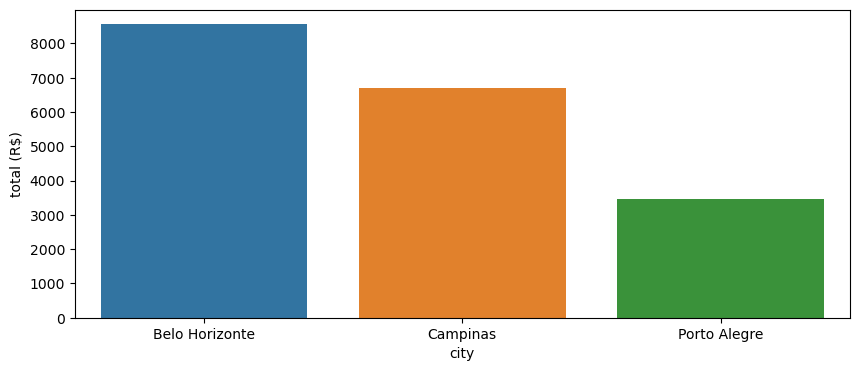

In [68]:
plt.figure(figsize=(10,4))
sns.barplot(x= large_fam_without['city'], y= large_fam_without['total (R$)'],ci= False);

## For large size families without furnished houses and also animals not accepted and also without hoa with these parameters we can say that porto alegre and campinas city are better for living.

In [69]:
house_df2.groupby('city')['total (R$)'].mean().sort_values(ascending=False)

city
São Paulo         6375.126296
Belo Horizonte    6312.865124
Rio de Janeiro    4611.684877
Campinas          3174.164319
Porto Alegre      2989.782900
Name: total (R$), dtype: float64

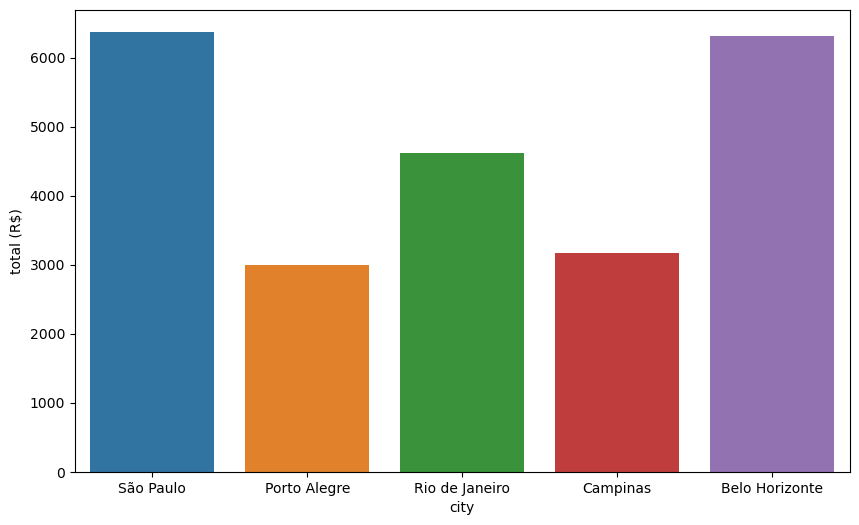

In [70]:
fig, ax=plt.subplots(figsize=(10,6))
sns.barplot(x=house_df2['city'], y=house_df2['total (R$)'], ci=False);

## By seeing above above graph Porto Alegre, Campinas are the cities that we can relocate. 

## Having animals impact on prices as per city

In [71]:
city_wise_animals=house_df2.groupby('animal')['total (R$)']
display(city_wise_animals.agg(['mean', 'median']))

,mean,median
animal,,
acept,5422.520708,3699.5
not acept,5710.761364,3217.5


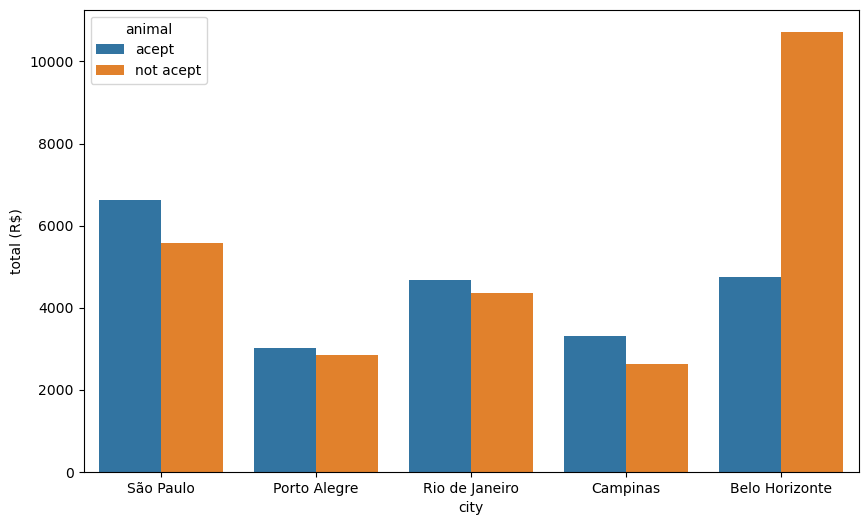

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(x=house_df2['city'], y=house_df2['total (R$)'], hue=house_df['animal'], ci=False);

## Analysing by city wise we can say that porto alegre and campinas are the cities that allows animals at low cost compared to remaining cities.

## Houses with higher HOA  have higher rent amount.

In [73]:
house_df2.groupby('city')['hoa'].mean().sort_values(ascending=False)

city
Belo Horizonte    2329.712690
São Paulo         1169.530002
Rio de Janeiro    1079.432378
Campinas           628.839202
Porto Alegre       491.618609
Name: hoa, dtype: float64

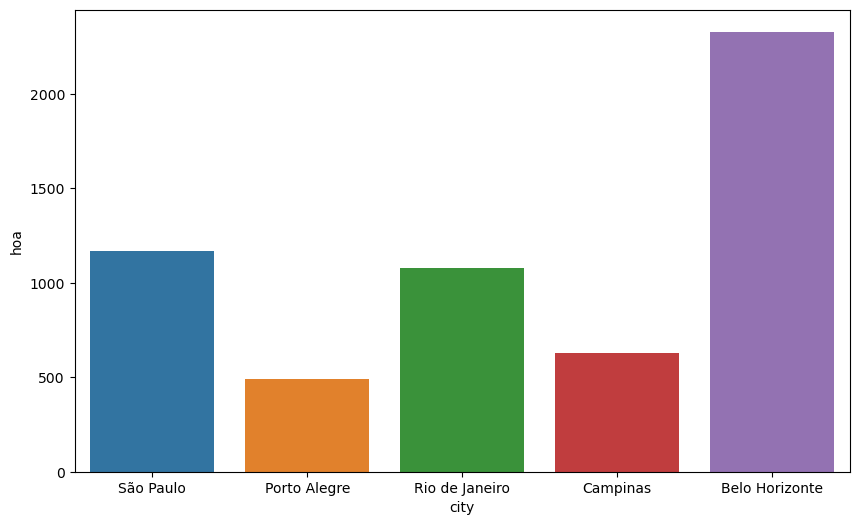

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x=house_df2['city'], y=house_df['hoa'], ci=False);

## Houses with lowest HOA is porto alegre and campinas when compared with remaining cities.

## Furnished houses have higher rent value

In [75]:
house_df2.groupby('furniture')['total (R$)'].mean().sort_values(ascending=False)

furniture
furnished        6584.060723
not furnished    5133.230198
Name: total (R$), dtype: float64

<Figure size 1200x600 with 0 Axes>

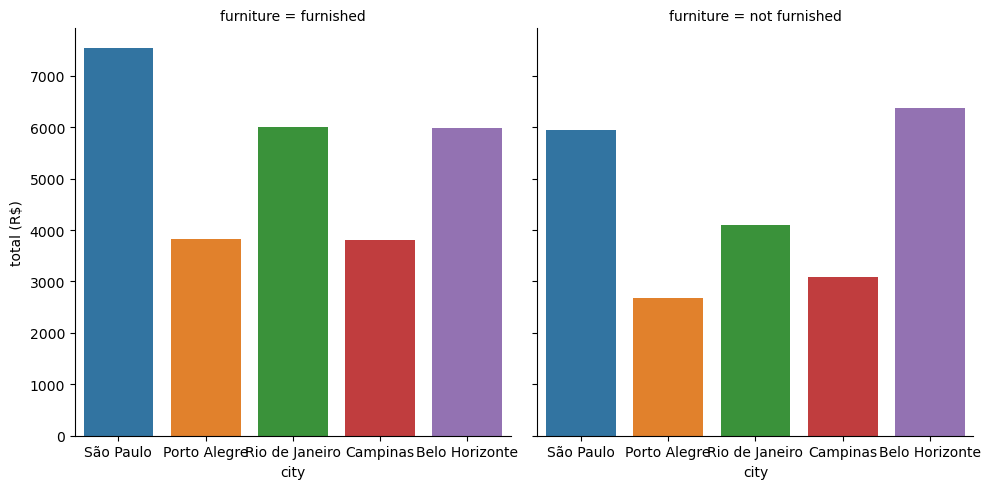

In [76]:
plt.figure(figsize=(12,6))
sns.catplot(x='city', y='total (R$)', col='furniture', kind='bar', ci=False, data=house_df2);

## Cities with furnished increase the total cost and two cities porto alegre and campinas are the cities where furnished houses are less compared with remaining cities.

## Parking spaces

In [77]:
house_df2.groupby('parking_spaces')['total (R$)'].mean().sort_values(ascending=False)

parking_spaces
7     12043.333333
6     11506.447205
5     11325.484716
4     11010.196701
8     10423.447154
3      8783.166494
2      6070.200677
10     3993.000000
0      3614.330350
1      3598.479063
Name: total (R$), dtype: float64

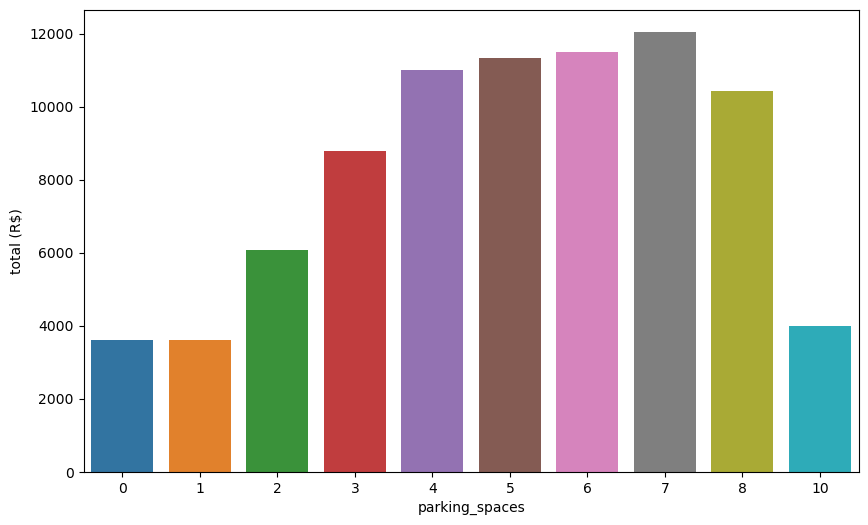

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x=house_df2['parking_spaces'], y=house_df2['total (R$)'], ci=False);

## Parking spaces also increases the total cost if there are more parking spaces if parking spaces increases from 0 to 7 from 7 to 10 it again decreases and parking spaces with 8 is lower than 7 whereas with 10 parking spaces lower than 2 parking spaces.

## Conclusion :

### By analysing above graphs we can say that Belo horizonte and porto alegre are the cities better for bachelors with furnished house and as well as animals accepted.

### By analysing above graph we can say that Porto Alegre and Belo Horizonte are the cities best for bachelors without furnished and also animals not allowed also no condominium fee and there is huge drop in price when removing these parameters.

### By analysing above graph for mid size families with furnished house and accepting animals campinas and belo horizonte cities are best for relocation when compared with remaining cities.

### By analysing above graph for mid size families without furinshed house and also not accepting animals with these parameters Belo horizonto and campinas cities are better for living without these parameters there is more difference in the total price.

### For large families porto alegre and campinas are the cities better for living with furnished houses and as well as animals allowed.

### For large size families without furnished houses and also animals not accepted and also without condominium fee without these parameters we can say that porto alegre and campinas city are better for living.

## From above we can say that below factors having high impact on prices:


## Having animals, HOA, Furnished houses, Number of parking spaces are having high impact on total price who doesnt need these parameters can we have drop in price.